### Importing data

In [2]:
import numpy as np
import matplotlib.pyplot

cutoff = 300

# importing the training data
encodings = []
ages_distr = []
for i in range(1, 101):
    enc = np.load(f'bigdata/encodings/train/X{i}.npy')[:cutoff]
    ages_distr.append(enc.shape[0])
    enc_i = np.concatenate((enc, i * np.ones((enc.shape[0], 1))), axis=1)
    encodings.append(enc_i)
encodings = np.concatenate(encodings)                                  # matrix with ages column  

# importing the testing data
test_encodings = []
test_ages_distr = []
for i in range(1, 101):
    enc = np.load(f'bigdata/encodings/test/X{i}.npy')[:cutoff]
    test_ages_distr.append(enc.shape[0])
    enc_i = np.concatenate((enc, i * np.ones((enc.shape[0], 1))), axis=1)
    test_encodings.append(enc_i)
test_encodings = np.concatenate(test_encodings)                                  # matrix with ages column  

#separating the data
X = encodings[:,:-1]           # matrix without ages column
Y = encodings[:,-1]            # ages only

#separating the test data
X_test = test_encodings[:,:-1]           # matrix without ages column
Y_test = test_encodings[:,-1]            # ages only

### PCA

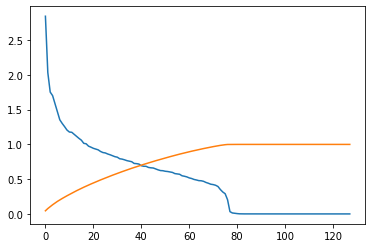

In [3]:
# finding PCA
X_avg = np.mean(X, axis=0)
n = X_avg.shape[0]
X = X - X_avg
U, S, VT = np.linalg.svd(X / np.sqrt(n), full_matrices=False)
cdS = np.cumsum(S) / np.sum(S)  # Cumulative energy
r90 = np.min(np.where(cdS > 0.9))

#plots
matplotlib.pyplot.plot(range(len(S)),S)
matplotlib.pyplot.plot(range(len(S)),cdS)

### Modeling

In [4]:
from sklearn.linear_model import LinearRegression

Mse = []
for pca_n in range(1,r90+1):
    Xpc = X @ VT[0:pca_n].T
    Xpc_test = X_test @ VT[0:pca_n].T
    reg = LinearRegression().fit(Xpc, Y)
    mse = np.sum(np.power(reg.predict(Xpc_test) - Y_test,2))/Y_test.shape[0]
    Mse.append(mse)

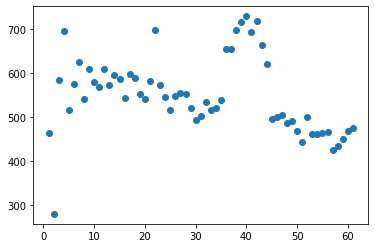

In [5]:
matplotlib.pyplot.plot(range(1,r90+1),Mse,"o")

In [16]:
Mse[:4]

[465.27133515219765, 280.909969823939, 583.824994695928, 696.4224345426037]

In [6]:
pca_n = 2
Xpc = X @ VT[0:pca_n].T
Xpc_test = X_test @ VT[0:pca_n].T
reg = LinearRegression().fit(Xpc, Y)

In [7]:
Xpc.shape

(23850, 2)

In [8]:
X.shape

(23850, 128)